# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [2]:
import numpy as np
import pandas as pd

sales = [3505,2400,3027,2798,3700,3250,2689]

sales_df = pd.DataFrame({'Sales':sales})
mean = sales_df.Sales.sum()/len(sales_df)

observations = len(sales_df)-1

sales_df['Distance'] = sales_df.Sales - mean
sales_df['Square_Distance'] = sales_df.Distance ** 2
variance = sales_df.Square_Distance.sum()/observations
sales_std = variance**.5
print('Mean:',mean)
print('\nVariance:',variance)
print('\nStandard Deviation:',variance**.5)

Mean: 3052.714285714286

Variance: 214387.90476190473

Standard Deviation: 463.0204150595357


In [3]:
sales_df.Sales.describe()

count       7.000000
mean     3052.714286
std       463.020415
min      2400.000000
25%      2743.500000
50%      3027.000000
75%      3377.500000
max      3700.000000
Name: Sales, dtype: float64

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [4]:
customers = [127,80,105,92,120,115,93]

df = pd.DataFrame({'Sales':sales,'Customers':customers})
cov = df.cov()
cov

,Sales,Customers
Sales,214387.904762,7604.357143
Customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

Well, it just so happens that we do have such a measure of spread of a variable. It's called the Standard Deviation! And we already learned about it. If we divide our covariance values by the product of the standard deviations of the two variables, we'll end up with what's called the Correlation Coefficient. (Sometimes just referred to as the correlation).

In [5]:
mean = df.Customers.sum()/len(customers)
observations = len(customers)-1
df['customers_distance'] = df.Customers-mean
df['square_distance'] = df.customers_distance**2
variance = df.square_distance.sum()/observations
std = variance**.5
std

17.057326313123664

In [6]:
this_std = std*sales_std
coef = cov.Customers[0]/this_std
print('Correlation Coefficient:',coef)

Correlation Coefficient: 0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [7]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', index_col='Unnamed: 0')
titanic.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [8]:
titanic.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

(-1, 5)

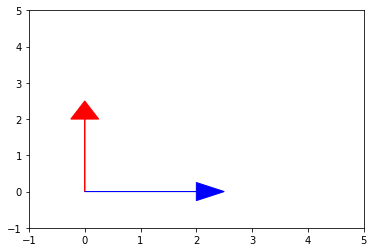

In [9]:
import matplotlib.pyplot as plt
#perpendicular 
vec1 = [0,2]
vec2 = [2,0]

plt.arrow(0,0,0,2,head_width=0.5, head_length=0.5, color='red')
plt.arrow(0,0,2,0,head_width=0.5, head_length=0.5, color='blue')
plt.ylim(-1,5)
plt.xlim(-1,5)

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [10]:
a= [-5,3,7]
b= [6,-8,2]



print('These vectors are not orthogonal, their dot product would be 0 if they were')
np.dot(a,b)

These vectors are not orthogonal, their dot product would be 0 if they were


-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [11]:
c= np.array([2,-15,6,20])
c_sqr = c**2
print(((c_sqr.sum())**.5)**2)

print(np.dot(c,c))
print(np.matmul(c.T,c))
print("They're all the same number")


665.0
665
665
They're all the same number


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0\\1\end{bmatrix}
\qquad
e = 2\begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} +-8\begin{bmatrix} 0 \\ 0 \\ 1  \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

Text(0.5, 1.0, 'Dependent')

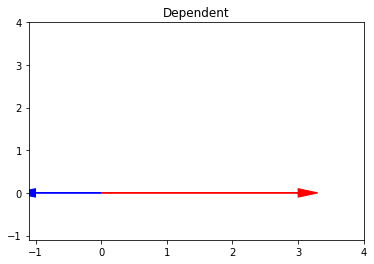

In [12]:


vec = [1,0] 

plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)


v1 = np.multiply(3, vec)
v2 = np.multiply(-1,vec)

plt.arrow(0,0,v1[0],v1[1], head_width=0.2, head_length=0.3, color='red')
plt.arrow(0,0,v2[0],v2[1], head_width=0.2, head_length=0.3, color='blue')
plt.title('Dependent')

Text(0.5, 1.0, 'independent')

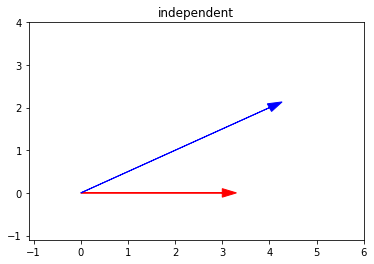

In [13]:

vec = [1,0] 
vec1 =[2,1]

plt.xlim(-1.1,6)          
plt.ylim(-1.1,4)


v1 = np.multiply(3, vec)
v2 = np.multiply(2,vec1)

plt.arrow(0,0,v1[0],v1[1], head_width=0.2, head_length=0.3, color='red')
plt.arrow(0,0,v2[0],v2[1], head_width=0.2, head_length=0.3, color='blue')
plt.title('independent')

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

(-1, 10)

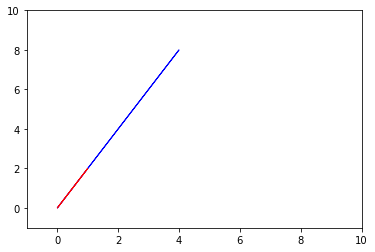

In [14]:
g= np.array([1,2])
h= np.array([4,8])

plt.arrow(0,0,4,8, color='blue')
plt.arrow(0,0,1,2,color='red')


plt.xlim(-1,10)
plt.ylim(-1,10)

# These vectors are dependent so they have a span of 0?

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# R3 i believe 

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



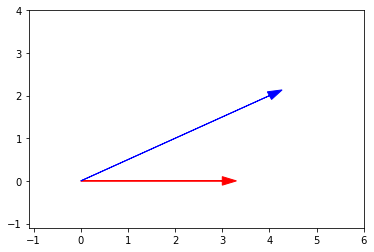

In [16]:

vec = [1,0] 
vec1 =[2,1]

plt.xlim(-1.1,6)          
plt.ylim(-1.1,4)


v1 = np.multiply(3, vec)
v2 = np.multiply(2,vec1)

plt.arrow(0,0,v1[0],v1[1], head_width=0.2, head_length=0.3, color='red')
plt.arrow(0,0,v2[0],v2[1], head_width=0.2, head_length=0.3, color='blue')


## 6.2 What does it mean to form a basis?

A basis is when you have two vectors who are independent that span a space V

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [17]:
p=np.array([[1,2,3],[-1,0,7],[4,8,2]])
np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

A rank of 3 with a demention of 3 means that this matrix fills it's boots. Nothing is dependant. It has full rank

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

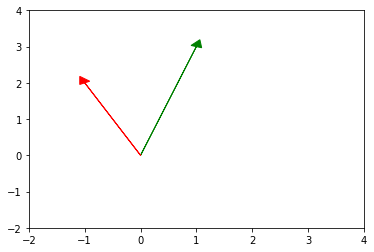

In [24]:
v= np.array([1,3])
w= np.array([-1,2])

plt.xlim(-2,4)
plt.ylim(-2,4)

plt.arrow(0,0,v[0], v[1], head_length=.2, head_width=.2, color='green')
plt.arrow(0,0,w[0],w[1], head_length=.2, head_width=.2, color= 'red')



# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()